In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd .read_csv('personality_dataset.csv')

In [8]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [40]:
df.shape

(2900, 8)

In [11]:
df.head(20)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [16]:
# Check missing values
print(df.isnull().sum())
num_cols = df.select_dtypes(include=['float64', 'int']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

for col in ['Stage_fear', 'Drained_after_socializing']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


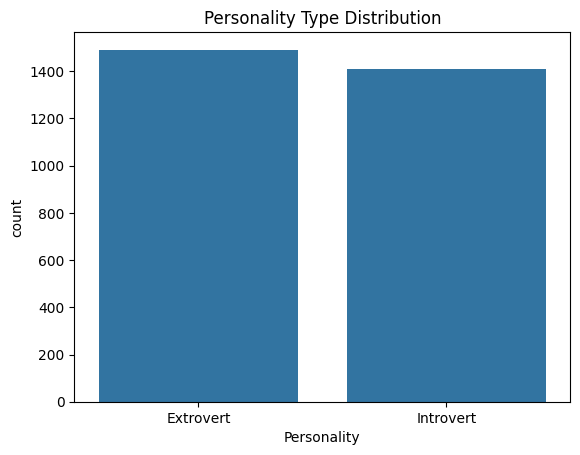

In [17]:
sns.countplot(data=df, x='Personality')
plt.title('Personality Type Distribution')
plt.show()

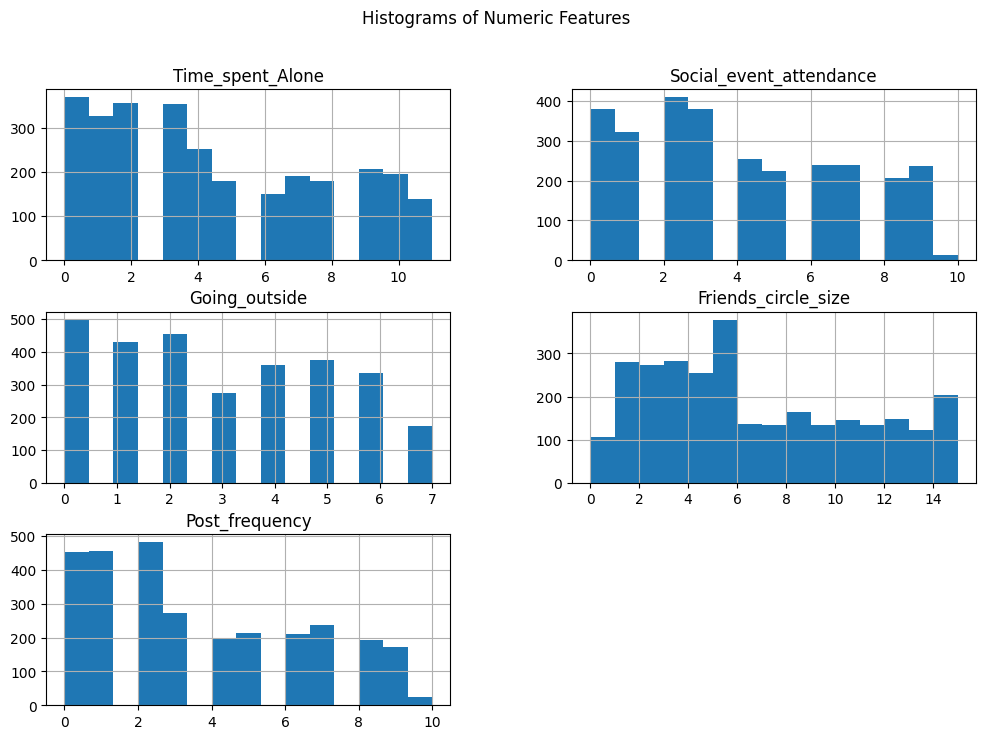

In [15]:
num_features = ['Time_spent_Alone', 'Social_event_attendance',
                'Going_outside', 'Friends_circle_size', 'Post_frequency']

df[num_features].hist(figsize=(12, 8), bins=15)
plt.suptitle('Histograms of Numeric Features')
plt.show()


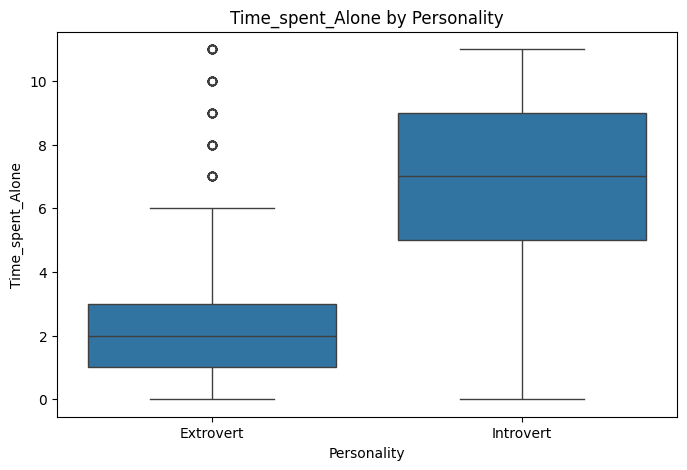

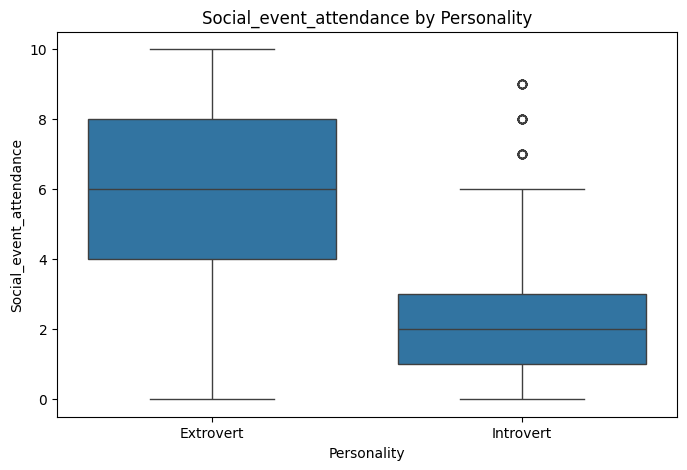

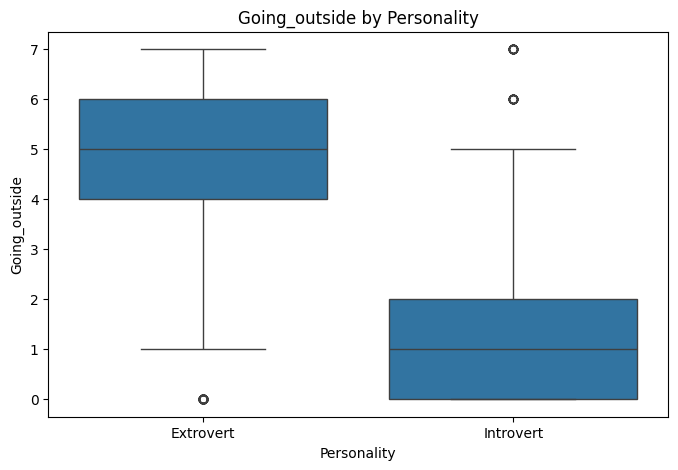

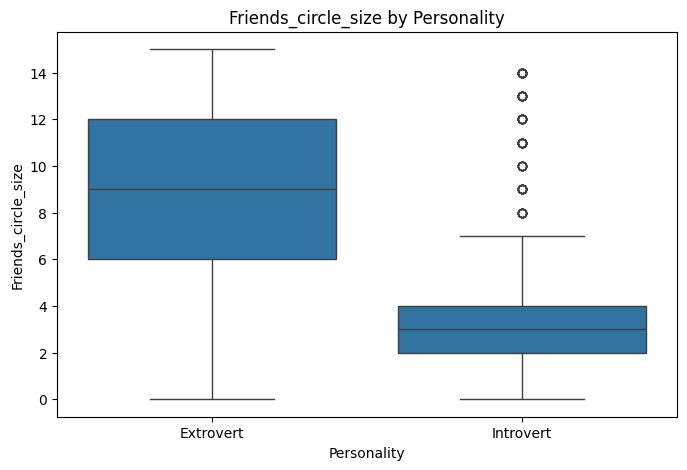

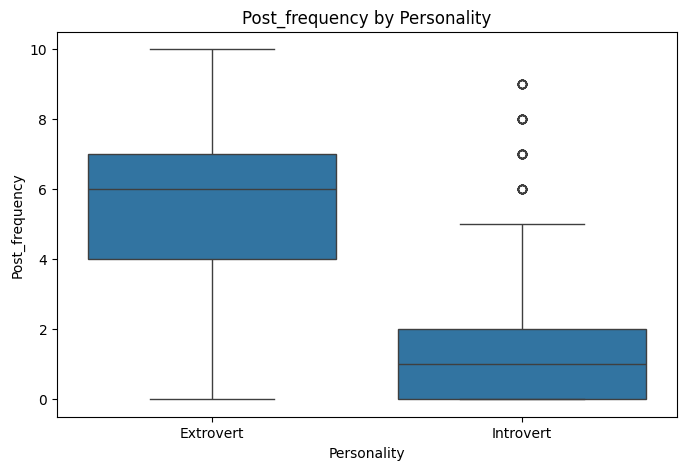

In [19]:
for col in num_features:

    plt.figure(figsize=(8, 5))

    sns.boxplot(data=df, x='Personality', y=col)

    plt.title(f'{col} by Personality')

    plt.show()

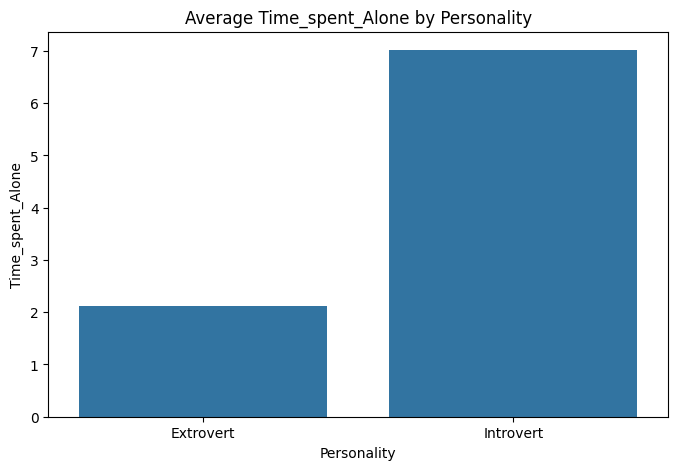

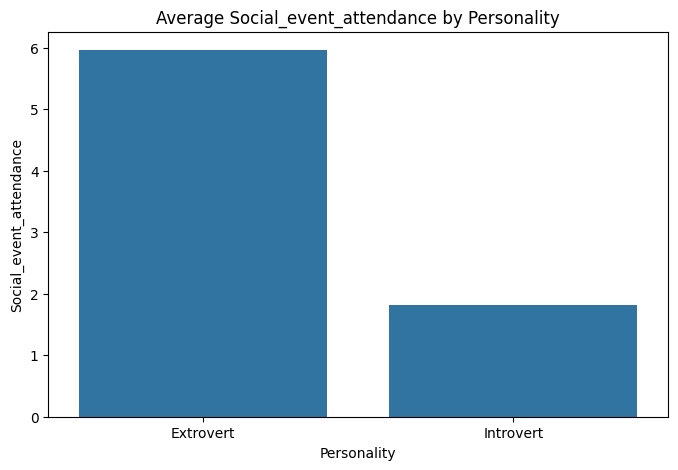

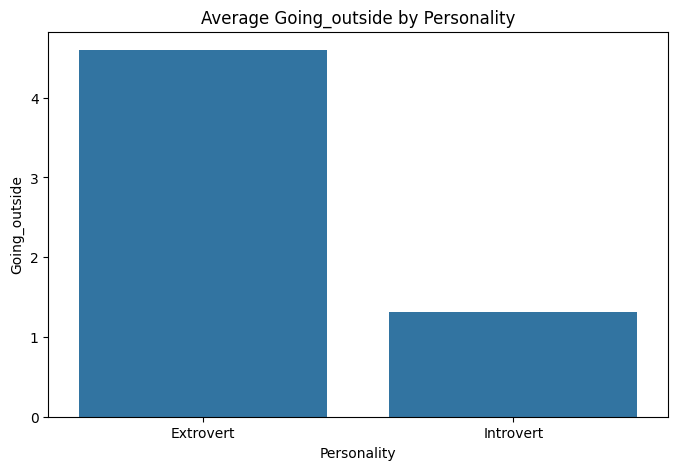

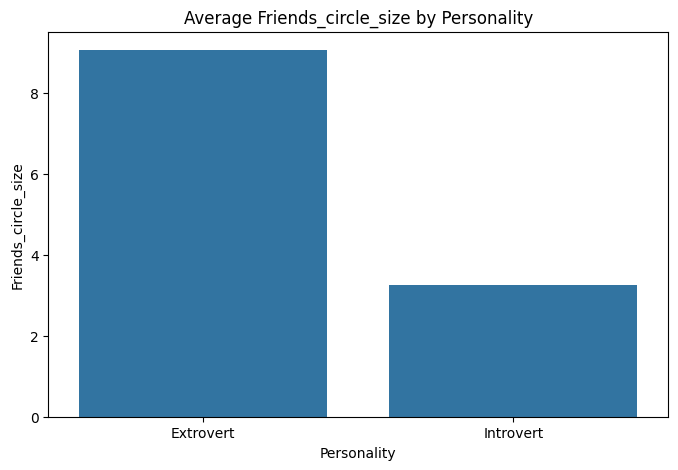

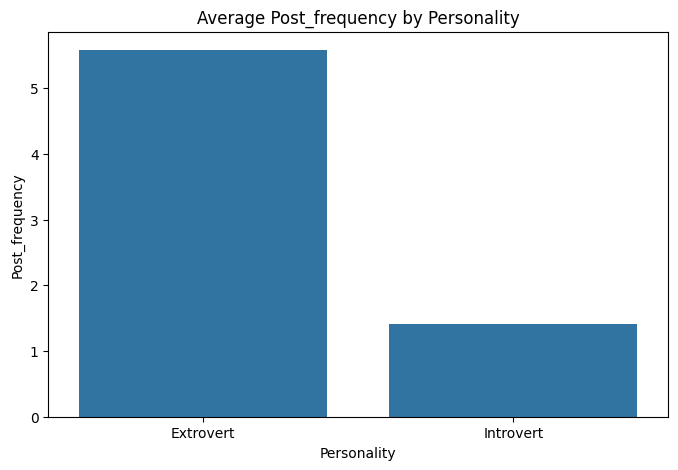

In [20]:
means = df.groupby('Personality')[num_features].mean().reset_index()

for col in num_features:

    plt.figure(figsize=(8, 5))

    sns.barplot(data=means, x='Personality', y=col)

    plt.title(f'Average {col} by Personality')

    plt.show()


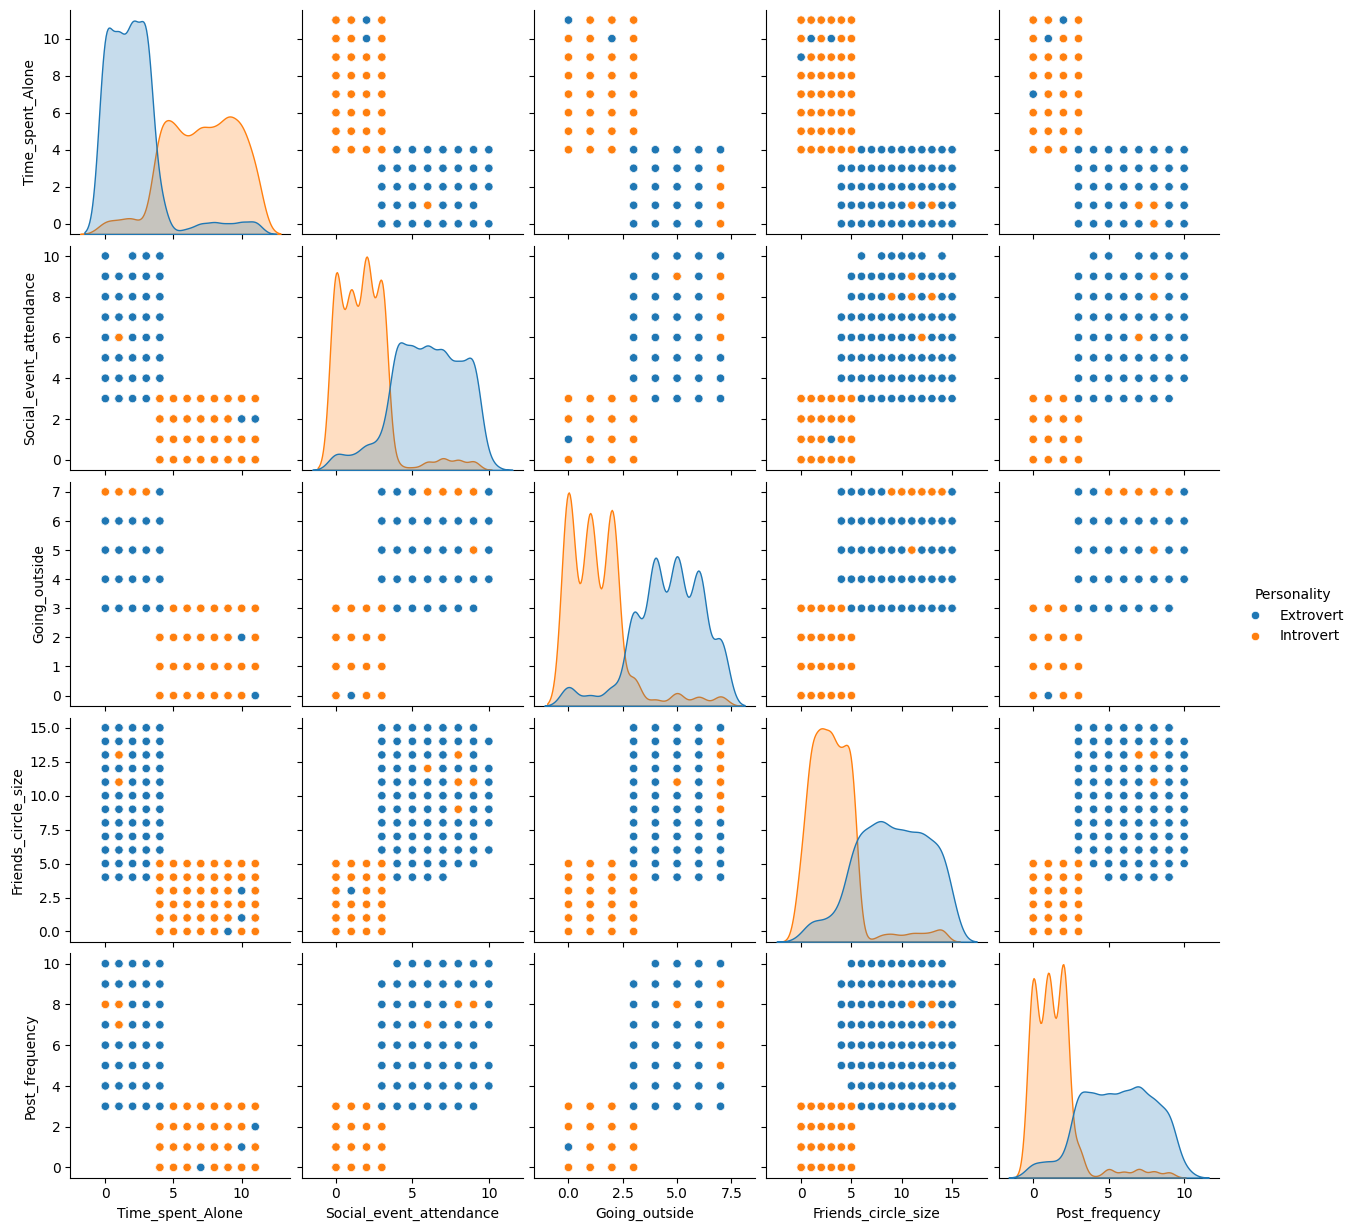

In [22]:
sns.pairplot(df[num_features + ['Personality']], hue='Personality')
plt.show()


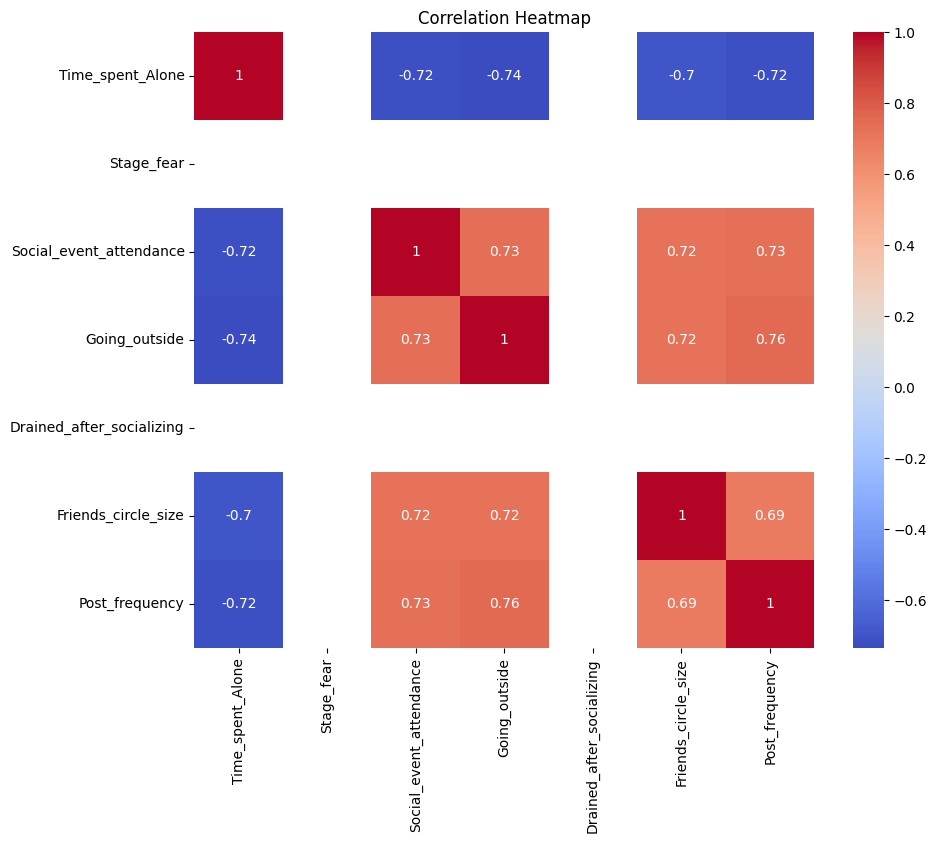

In [38]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [36]:
df.to_csv('cleaned_personality_dataset.csv', index=False)
print('Cleaned dataset saved.')


Cleaned dataset saved.


In [ ]:
Conclusion
With Seaborn and Matplotlib, we visualized personality traits clearly:

Introverts vs extroverts show distinct patterns in time alone, social events and friend circle size.
Pair plots and correlation heatmaps reveal relationships between features.
This notebook shows step-by-step data cleaning and full visual exploration.